# Module 9: Plotting and Visualization

<sub><sup>The notebook is prepared based on the ninth chapter of McKinney, M. (2017). Python for Data Analysis, O'Reilly. ISBN 9781491957660 and the [`chartio` tutorial](https://chartio.com/learn/charts/).</sup></sub>

Making informative visualizations (sometimes called plots) is one of the most important
tasks in data analysis. It may be a part of the exploratory process—for example,
to help identify outliers or needed data transformations, or as a way of generating
ideas for models. For others, building an interactive visualization for the web may be
the end goal. 

Python has many add-on libraries for making static or dynamic visualizations,
but we’ll be mainly focused on `matplotlib` and libraries that build on top of it.

To use interactive plotting in the notebook, please execute the following cell:

In [1]:
%matplotlib notebook
%matplotlib inline

## 1. A brief matplotlib API Primer
With `matplotlib`, we use the following import convention:

In [2]:
import matplotlib.pyplot as plt

We will create a simple plot. To do this, let's produce some raw data:

In [3]:
import numpy as np

data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Passing the data (which is an array) as the argument to `plot()` function will give us a simple line graph:

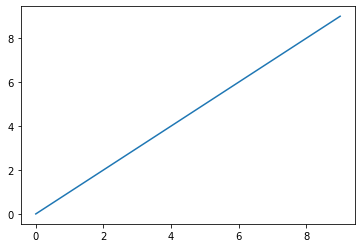

In [4]:
plt.plot(data)

### 1.1. Figures and Subplots
Plots in `matplotlib` reside within a `Figure` object. You can create a new figure with `plt.figure`.

You can’t make a plot with a blank figure. You have to create one or more subplots using `add_subplot`.

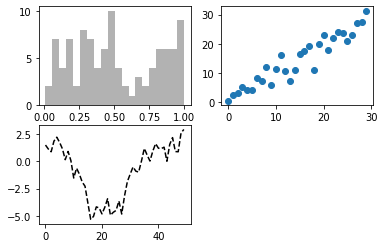

In [9]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

#The 'k--' is a style option instructing matplotlib to plot a black dashed line.
plt.plot(np.random.randn(50).cumsum(), 'k--')
#When you issue a plotting command like plt.plot(), matplotlib draws on the last figure and subplot used

#The objects returned by fig.add_subplot are AxesSubplot objects,
#You can draw different plots on them

#YOUR CODE GOES HERE
ax1.hist(np.random.rand(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

Creating a figure with a grid of `subplots` is a very common task, so `matplotlib`
includes a convenience method, `plt.subplots`, that creates a new figure and returns
a NumPy array containing the created subplot objects:

(array([4., 7., 4., 5., 6., 6., 6., 2., 5., 5., 3., 6., 3., 1., 8., 6., 4.,
        6., 7., 6.]),
 array([0.00487759, 0.05310432, 0.10133106, 0.14955779, 0.19778452,
        0.24601125, 0.29423799, 0.34246472, 0.39069145, 0.43891818,
        0.48714492, 0.53537165, 0.58359838, 0.63182511, 0.68005185,
        0.72827858, 0.77650531, 0.82473204, 0.87295878, 0.92118551,
        0.96941224]),
 <a list of 20 Patch objects>)

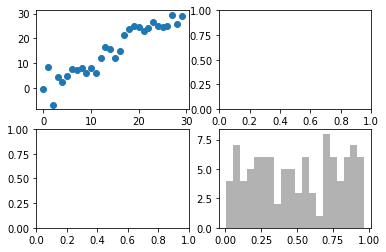

In [11]:
fig, axes = plt.subplots(2, 2)

#YOUR CODE GOES HERE
axes[0,0].scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))
axes[1,1].hist(np.random.rand(100), bins = 20, color = 'k', alpha = 0.3)

This is very useful, as the axes array can be easily indexed like a two-dimensional array; for example, `axes[0, 1]`. 

You can also indicate that subplots should have the same x- or y-axis using `sharex` and sharey, respectively. This is especially useful
when you’re comparing data on the same scale; otherwise, `matplotlib` autoscales plot limits independently.

See the argument list for this method:

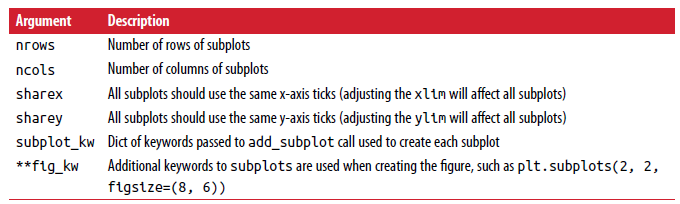

### 1.2. Adjusting the Spacing Around Subplots
By default `matplotlib` leaves a certain amount of padding around the outside of the
subplots and spacing between subplots.

You can change the spacing using the `subplots_adjust` method on Figure objects.

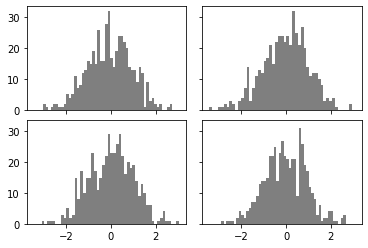

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)

### 1.3. Colors, Markers, and Line Styles
Matplotlib’s main `plot` function accepts arrays of `x` and `y` coordinates and optionally a string abbreviation indicating color and line style. 

For example, to plot `x` versus `y` with green dashes, you would execute:

    ax.plot(x, y, 'g--')

The same plot could also have been expressed more explicitly as:
    
    ax.plot(x, y, linestyle='--', color='g')
  
There are a number of color abbreviations provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE')

*Line plots* can additionally have markers to highlight the actual data points. Since `matplotlib` creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie. 

The `marker` can be part of the style string,
which must have color followed by marker type and line style.

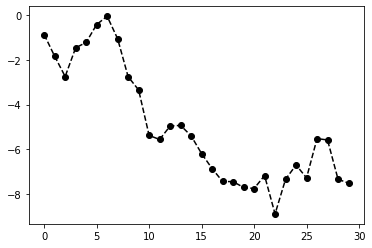

In [13]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitly as:

    plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

### 1.4. Adding Ticks and Labels 

To illustrate customizing the axes, we’ll create a simple figure and plot of a random walk:

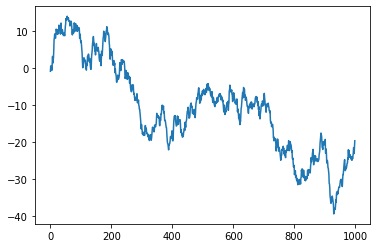

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it’s easiest to use `set_xticks` and `set_xticklabels`. 

The
former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels
using `set_xticklabels`:

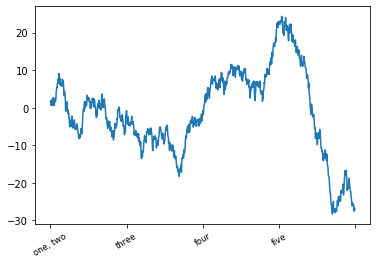

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250 , 500, 750, 1000])
labels = ax.set_xticklabels(['one, two', 'three', 'four', 'five'], rotation = 30, fontsize = 'small')

The `rotation` option sets the x tick labels at a 30-degree rotation. 

Lastly, `set_xlabel`
gives a name to the x-axis and `set_title` the subplot title:

Text(0.5, 0, 'Stages')

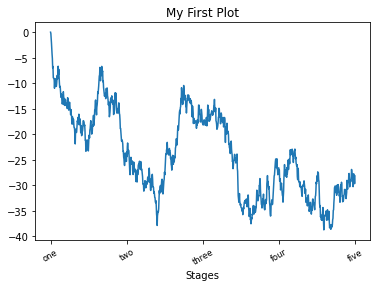

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

#YOUR CODE GOES HERE
ax.set_title('My First Plot')
ax.set_xlabel('Stages')

### 1.5. Adding Legends

Legends are another critical element for identifying plot elements. There are a couple
of ways to add one. 

The easiest is to pass the `label` argument when adding each piece
of the plot:

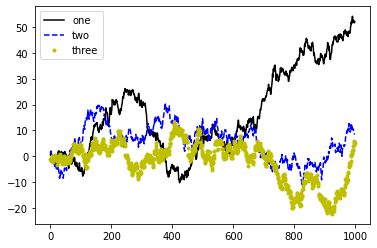

In [19]:
from numpy.random import randn

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label = 'one')
ax.plot(randn(1000).cumsum(), 'b--', label = 'two' )
ax.plot(randn(1000).cumsum(), 'y.', label = 'three')
ax.legend(loc='best')

## 1.6. Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes. 

You can add annotations and text using the `text`, `arrow`, and `annotate` functions. 

`text` draws text at given coordinates (x, y) on the plot with optional custom styling:

    ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

Annotations can draw both text and arrows arranged appropriately. 

As an example, we will annotate some important trends in a dataset about the number of graduates from a high school who could join a university.

Text(0.5, 1.0, '# Graduates Attending University')

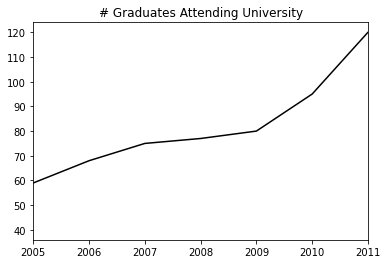

In [27]:
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('success_by_year.csv', index_col=0)
nUniWinners = data['University']

ax.plot(nUniWinners, 'k-')

# Zoom in on 2005 - 2011
#YOUR CODE GOES HERE
ax.set_xlim([2005, 2011])
ax.set_title('# Graduates Attending University')

Text(2016, 64, 'Peak Failure')

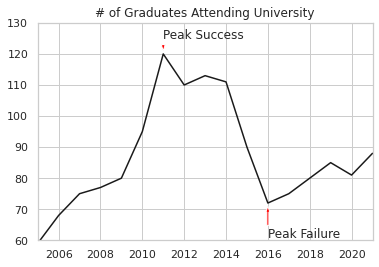

In [109]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('success_by_year.csv', index_col=0)
nUniWinners = data['University']

ax.plot(nUniWinners, 'k-')
ax.set_xlim([2005, 2021])
ax.set_ylim([60, 130])

ax.set_title('# of Graduates Attending University')

ax.annotate('Peak Success',
            xy = (2011, nUniWinners.asof(2011) +1),
            xytext = (2011, nUniWinners.asof(2011) + 8),
            arrowprops=dict(facecolor='red', headwidth=4, width=2, headlength=6),
            horizontalalignment='left', verticalalignment='top')
ax.annotate('Peak Failure',
            xy = (2016, nUniWinners.asof(2016) -1),
            xytext = (2016, nUniWinners.asof(2016) - 8),
            arrowprops=dict(facecolor='red', headwidth=4, width=2, headlength=6),
            horizontalalignment='left', verticalalignment='top')


There are a couple of important points to highlight in this plot: the `ax.annotate`
method can draw labels at the indicated x and y coordinates. 

We use the `set_xlim`
and `set_ylim` methods to manually set the start and end boundaries for the plot
rather than using matplotlib’s default. 

Lastly, `ax.set_title` adds a main title to the
plot.

You can save the active figure to file using `plt.savefig`. 

For example, to save an SVG version of a
figure, you need only type:

In [29]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

The file type is inferred from the file extension. So if you used .pdf instead, you
would get a PDF.

To get the
same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you
would do:

In [30]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## 2. Plotting with pandas and seaborn
`matplotlib` can be a fairly *low-level* tool. You assemble a plot from its base components:

* the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), 
* legend, title, tick labels, and other annotations.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

`pandas` itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. 

Another library is **seaborn**, a statistical graphics library that simplifies creating many common visualization types.

Importing seaborn modifies the default matplotlib color schemes
and plot styles to improve readability and aesthetics. Even if you do
not use the seaborn API, you may prefer to import seaborn as a
simple way to improve the visual aesthetics of general matplotlib
plots.

We will work on several visualizations using the PISA Math Score data. 

Let's import it.

In [82]:
pisa_math = pd.read_excel('pisa-mathematics-u2018.xlsx', index_col=[0, 1])
pisa_math.head()

Average
Year  Country         
2018  Denmark    509.0
      Estonia    523.0
      Finland    507.0
      France     495.0
      Germany    500.0

What we want to achieve is to display the change in the performance of Turkey in PISA over the years.

To achieve this we should do some rotations. The different year values should be the columns (e.g., 2003, 2006 ,etc.).

In this way, the yearly change per country can be displayed in a single row.

In [83]:
#YOUR CODE GOES HERE
pisa_math = pisa_math.unstack(0)
pisa_math.head()

Average                                   
Year       2003   2006   2009   2012   2015   2018
Country                                           
Denmark   514.0  513.0  503.0  500.0  511.0  509.0
Estonia     NaN  515.0  512.0  521.0  520.0  523.0
Finland   544.0  548.0  541.0  519.0  511.0  507.0
France    511.0  496.0  497.0  495.0  493.0  495.0
Germany   503.0  504.0  513.0  514.0  506.0  500.0

We do not need any more `Average` level-0 index in the columns. So, we will drop it using `droplevel()`.

In [84]:
#YOUR CODE GOES HERE
pisa_math.columns = pisa_math.columns.droplevel()
pisa_math

Year,2003,2006,2009,2012,2015,2018
Country,,,,,,
Denmark,514.0,513.0,503.0,500.0,511.0,509.0
Estonia,NaN,515.0,512.0,521.0,520.0,523.0
Finland,544.0,548.0,541.0,519.0,511.0,507.0
France,511.0,496.0,497.0,495.0,493.0,495.0
Germany,503.0,504.0,513.0,514.0,506.0,500.0
Greece,445.0,459.0,466.0,453.0,454.0,451.0
Spain,485.0,480.0,483.0,484.0,486.0,481.0
Sweden,509.0,502.0,494.0,478.0,494.0,502.0
Switzerland,527.0,530.0,534.0,531.0,521.0,515.0


### 2.1. Line Plots
A Line chart is a graph that represents information as a series of data points connected by a straight line. 

In line charts, each data point or marker is plotted and connected with a line or curve. 

Let's plot a line graph using to see how Turkey's PISA score has changed over time. 

To do so, we will first select only Turkey's data from `pisa_math` and keep it in new dataframe called `pisa_math_tr`.

In [85]:
#YOUR CODE GOES HERE
pisa_math_tr = pisa_math.loc['Turkey', :]
pisa_math_tr

Year 
2003    423.0
2006    424.0
2009    445.0
2012    448.0
2015    420.0
2018    454.0
Name: Turkey, dtype: float64

Now, we are ready to build the line plot quickly by using `plt.plot` function.

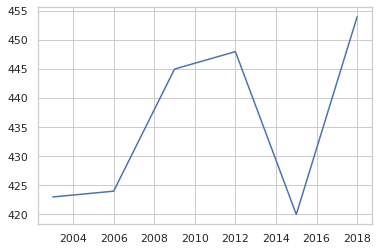

In [86]:
#YOUR CODE GOES HERE
plt.plot(pisa_math_tr)

Let's add labels to the axes so that we can show what each axis represents.  

Text(0, 0.5, 'Math PISA Score')

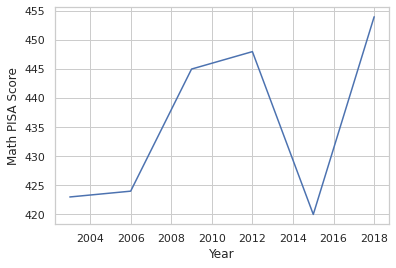

In [87]:
plt.plot(pisa_math_tr)
plt.xlabel('Year')
plt.ylabel('Math PISA Score')

Alternatively, we can use actually the `plot()` function for the dataframe/Series object. 

In this case, the index name ('Year') of the Series will be set as the xlabel automatically.

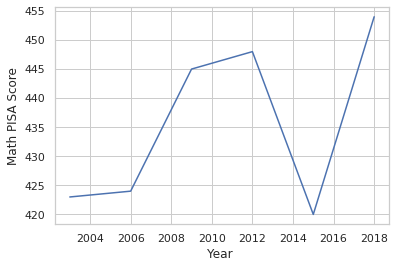

In [88]:
pisa_math_tr.plot(ylabel='Math PISA Score')

DataFrame’s `plot` method plots each of its columns as a different line on the same
*subplot*, creating a legend automatically.

For example, now we want to display the pisa score change for each Country, represented as a separate line. 

Below is the graph we want to achieve:

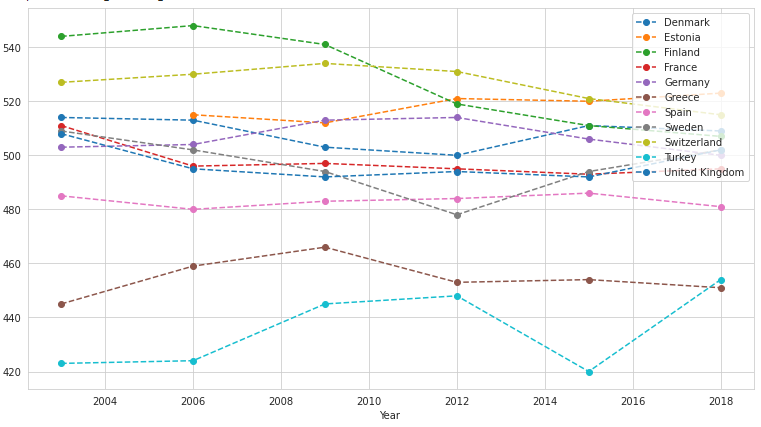

To be able to produce this plot, the x-axis should be the years.

In the `pisa_math` dataframe, the countries are the row index, and the columns are the years. 

If you call the plot function for the `pisa_math` dataframe right now, you will obtain the following graph. 

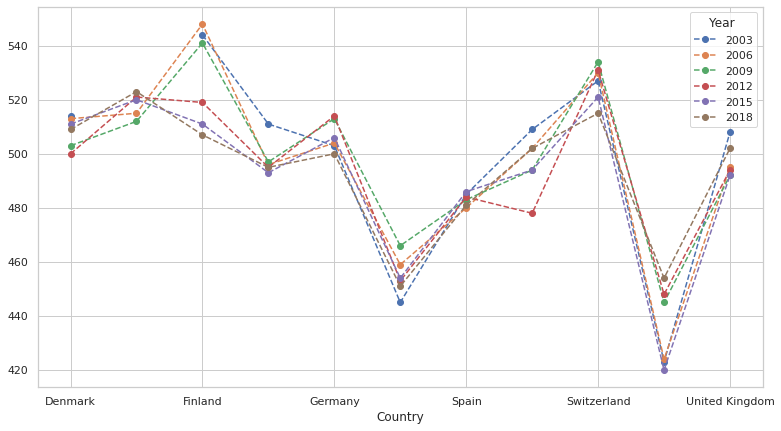

In [89]:
pisa_math.plot(figsize=(13,7), linestyle='dashed', marker='o')

To obtain the plot we desired where the legends are the countries, we need to swap the `Year` with `Country`. 

> That is, `Year` should be row index, and the Country names should be columns.

This can be achieved with:


In [90]:
#YOUR CODE GOES HERE
pisa_math.stack().unstack('Country')

Country,Denmark,Estonia,Finland,France,Germany,Greece,Spain,Sweden,Switzerland,Turkey,United Kingdom
Year,,,,,,,,,,,
2003,514.0,NaN,544.0,511.0,503.0,445.0,485.0,509.0,527.0,423.0,508.0
2006,513.0,515.0,548.0,496.0,504.0,459.0,480.0,502.0,530.0,424.0,495.0
2009,503.0,512.0,541.0,497.0,513.0,466.0,483.0,494.0,534.0,445.0,492.0
2012,500.0,521.0,519.0,495.0,514.0,453.0,484.0,478.0,531.0,448.0,494.0
2015,511.0,520.0,511.0,493.0,506.0,454.0,486.0,494.0,521.0,420.0,492.0
2018,509.0,523.0,507.0,495.0,500.0,451.0,481.0,502.0,515.0,454.0,502.0


Now we can build the plot:

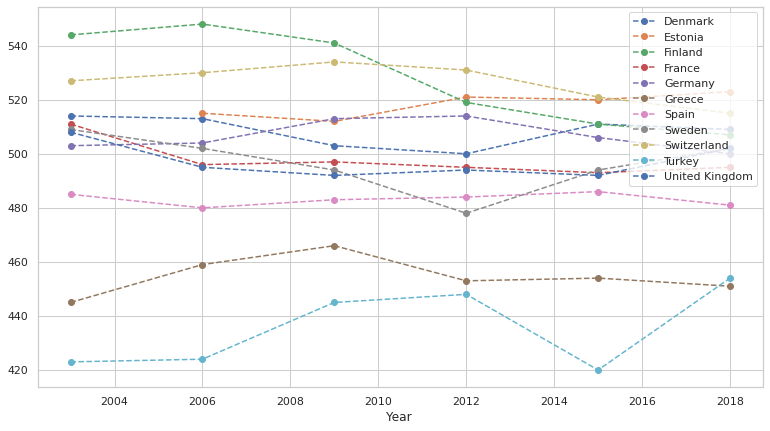

In [95]:
import seaborn as sns
sns.set_style("whitegrid")#darkgrid

pisa_math.stack().unstack('Country').plot(figsize = (13,7), linestyle = 'dashed', marker = 'o')
plt.legend(loc = 'upper right')

To show each data point on our graph, we can highlight them with markers using the marker argument. Many different marker shapes like a circle, cross, square, diamond, etc. are provided by Matplotlib.

### 2.2. Bar Plots/Charts
One of the most fundamental chart types is the bar chart. A bar chart (aka bar graph, column chart) plots numeric values for levels of a categorical feature as bars. 

Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. 

Below is an example bar plot:

<img src='https://chartio.com/assets/f06f02/tutorials/charts/bar-charts/4231f2343fb3c86edcd9e468db398d33c18ab1c16c6d38a1afedf0e06ca8fc4d/bar-chart-example-3.png'></img>

Bars are plotted on a common baseline to allow for easy comparison of values.

The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots, respectively.

In this case, the Series or DataFrame *index* is used as the x (bar) or y (barh) ticks.

To build plots, we will import the Course Components data. This dataset contains different information about components of a course, such its module, number of visits to the component, difficulty level, the grade contribution.

In [96]:
ccomps = pd.read_excel('course-components.xlsx')
ccomps.head()

,ID,Type,Module,Visits,FirstTimeVisited,LastTimeVisited,Difficulty,GradeContr
0,3,MC Test,1,75,2,5,Difficult,30
1,10,Project,1,69,2,7,Easy,40
2,30,Video Practice,1,29,1,4,Easy,10
3,33,Quiz,1,87,3,6,Easy,30
4,12,Assignment,1,39,1,7,Difficult,35


What we are interested in is the grade contribution (`GradeContr`) of different type of components such as Quiz, Assignment, etc.

To visualize such data, first we need to compute, let's say mean, `GradeContr` of each course. We can use `groupby` for this purpose:

In [97]:
#YOUR CODE GOES HERE
group_byType = ccomps.groupby('Type')
group_byType

Now that we have the group object, we can use it to compute various statistics, such as mean:

In [98]:
group_byType.mean()

,ID,Module,Visits,FirstTimeVisited,LastTimeVisited,GradeContr
Type,,,,,,
Assignment,40.833333,3.388889,54.833333,18.888889,21.611111,40.277778
MC Test,39.833333,2.500000,43.388889,14.111111,15.777778,26.833333
Project,28.400000,3.000000,48.000000,16.800000,20.000000,32.000000
Quiz,39.133333,3.333333,39.666667,19.133333,21.666667,24.400000
Video Practice,38.578947,3.105263,49.736842,17.210526,20.473684,26.052632


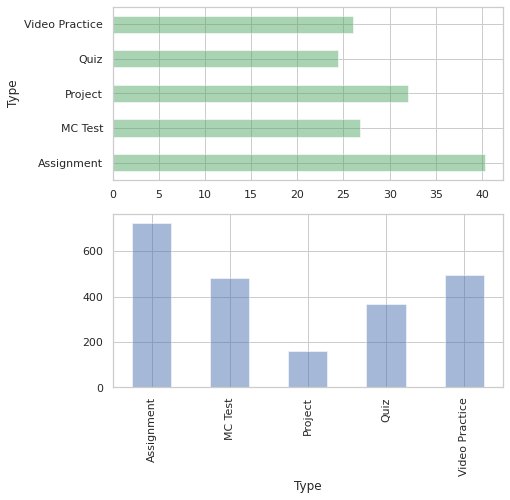

In [101]:
#YOUR CODE GOES HERE
fig, axes = plt.subplots(2, 1, figsize = (7,7))
group_byType['GradeContr'].mean().plot.barh(ax = axes[0], color = 'g', alpha = 0.5)
group_byType['GradeContr'].sum().plot.bar(ax = axes[1], color = 'b', alpha = 0.5)

The options `color='g'` and `alpha=0.7` set the color of the plots to green and use partial transparency on the filling.

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value.

In [50]:
#YOUR CODE GOES HERE
comps_gradeVisits = pd.concat([group_byType['GradeContr'].mean(),
           group_byType['Visits'].mean()], axis = 1)
comps_gradeVisits

,GradeContr,Visits
Type,,
Assignment,40.277778,54.833333
MC Test,26.833333,43.388889
Project,32.000000,48.000000
Quiz,24.400000,39.666667
Video Practice,26.052632,49.736842


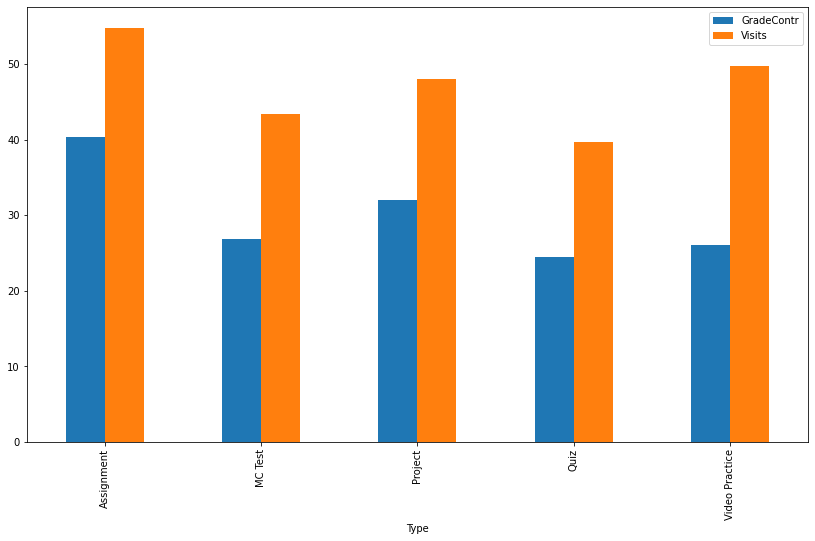

In [51]:
comps_gradeVisits.plot.bar(figsize=(14, 8))

We can create stacked bar plots from a DataFrame by passing `stacked=True`, resulting in
the value in each row being stacked together.

To produce a *stacked* bar chart, we will first get the number of different component types in each module using `crosstab` function:

In [52]:
#YOUR CODE GOES HERE
ccomps_counts = pd.crosstab(ccomps['Module'], ccomps['Type'] )
ccomps_counts

Type,Assignment,MC Test,Project,Quiz,Video Practice
Module,,,,,
1,2,5,1,1,3
2,2,4,1,2,1
3,6,6,1,6,9
4,3,1,1,3,3
5,5,2,1,3,3


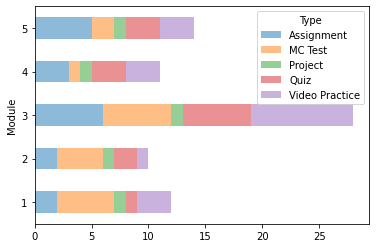

In [53]:
#YOUR CODE GOES HERE
ccomps_counts.plot.barh(stacked = True, alpha = 0.5)

Although using `groupby`, `crosstab`, `pivot_table` functions can be used, with data that requires *aggregation* or *summarization* before making a plot, using the seaborn package can make things much simpler. 

As the first example, we want to visualize the first day different component types were visited. Per `Type` (of components), we will compute the mean for the `FirstDayVisited`.

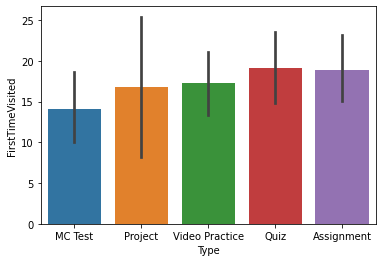

In [57]:
#YOUR CODE GOES HERE
sns.barplot(x= 'Type', y = 'FirstTimeVisited',
            data = ccomps, orient = 'v', estimator = np.mean)

Plotting functions in seaborn take a `data` argument, which can be a pandas DataFrame, as in the example above.

The other arguments refer to column names. Because there are multiple
observations for each value in a component type, the bars are the average value of `FirstTimeVisited`. 

The
black lines drawn on the bars represent the 95% confidence interval (this can be configured
through optional arguments).

`seaborn.barplot` has a **`hue`** option that enables us to split by an additional *categorical*
value.

For example, we can compute the total visits to components grouped by each module and categorize them additionally by the difficulty level (by using `hue` argument): 

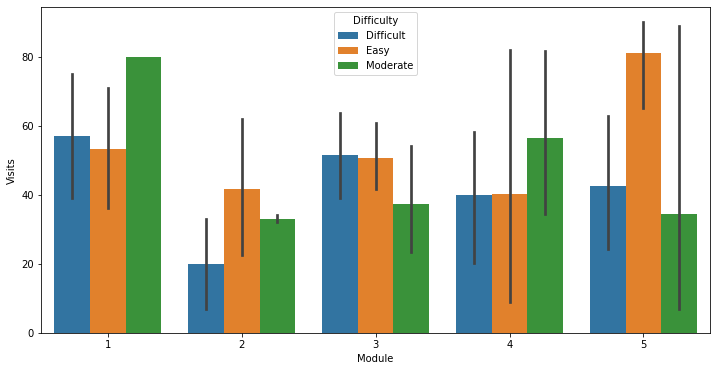

In [58]:
#YOUR CODE GOES HERE
plt.figure(figsize = (12,6))
sns.barplot(y='Visits', x = 'Module', hue = 'Difficulty', data = ccomps)

`seaborn` automatically changes teh aesthetics of plots - default color palette, plot background and grid line colors.

We can switch between plot appearences using `seaborn.set`.

In [59]:
sns.set(style="whitegrid")

### 2.3. Histogram and Density plots
A *histogram* is a chart that plots the distribution of a numeric variable’s values as a series of bars. 

Each bar typically covers a range of numeric values called a bin or class; a bar’s height indicates the frequency of data points with a value within the corresponding bin.

For example, we can plot the distribution of the number of visits to course components:

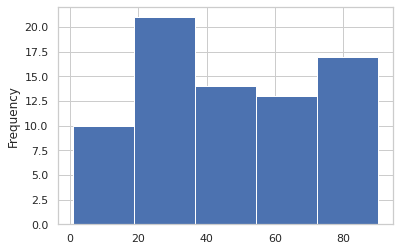

In [60]:
ccomps['Visits'].plot.hist(bins=5)

We can also plot the distribution of the first day course components were visited:

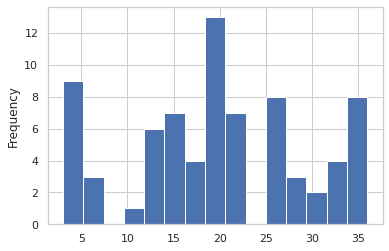

In [61]:
ccomps['LastTimeVisited'].plot.hist(bins=15)

Below is the `seaborn` version of the histogram plot:

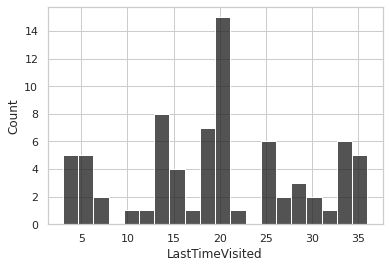

In [62]:
sns.histplot(ccomps['LastTimeVisited'], bins=20, color='k')

### 2.4. Scatter or Point plots
A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. 

The position of each dot on the horizontal and vertical axis indicates values for an individual data point. 

> Scatter plots are used to observe relationships between variables.

Let's visualize the relationship between the `Visits` and `GradeContr` data:

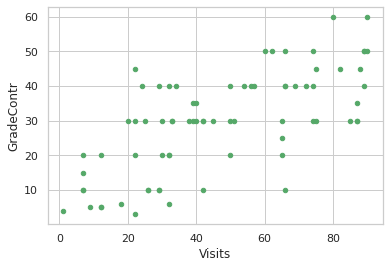

In [63]:
#YOUR CODE GOES HERE
ccomps.plot.scatter(x = 'Visits', y = 'GradeContr', c = 'g')

We can use seaborn's `regplot` method to make a scatter plot an fit a linear regression line.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


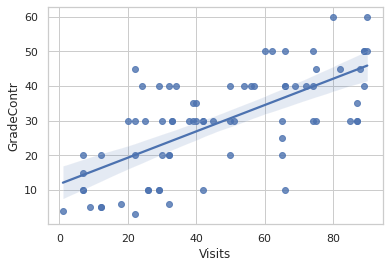

In [64]:
sns.regplot('Visits', 'GradeContr', data=ccomps)

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a *pairs plot* or *scatter plot matrix*. 

Making such a plot from scratch is a bit of work, so seaborn has a convenient pairplot function,
which supports placing histograms or density estimates of each variable along the diagonal. 

Let's use this function on the following columns: 'Visits', 'GradeContr', 'FirstTimeVisited', 'LastTimeVisited'

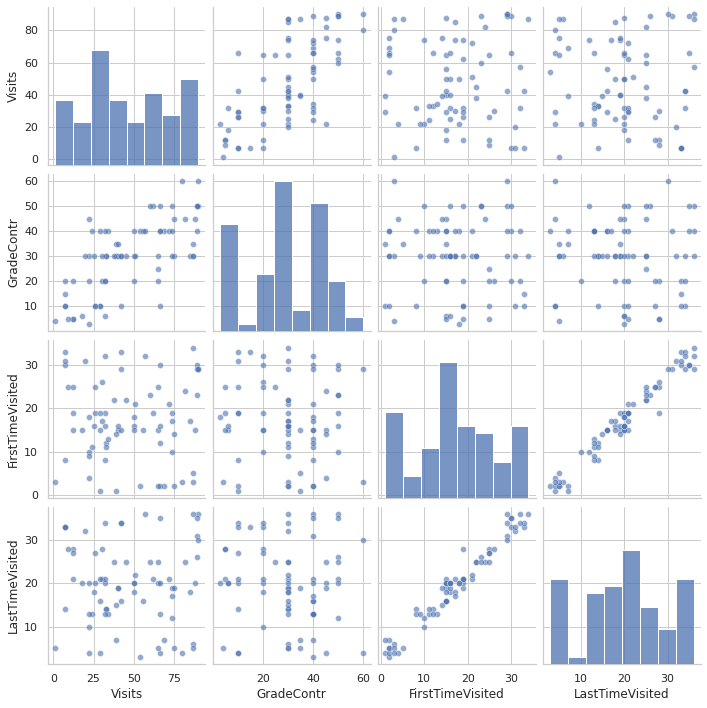

In [65]:
sns.pairplot(ccomps[['Visits', 'GradeContr', 'FirstTimeVisited', 'LastTimeVisited']], 
             diag_kind='hist', plot_kws={'alpha': 0.6})

### 2.5. Facet Grids and Categorical Data
What about datasets where we have additional grouping dimensions? 

One way to visualize data with many categorical variables is to use a facet grid. 

Seaborn has a useful
built-in function `catplot` that simplifies making many kinds of faceted plots.

In the following, we visualize the number of visits to different course components per each module, categorized by the difficulty levels.

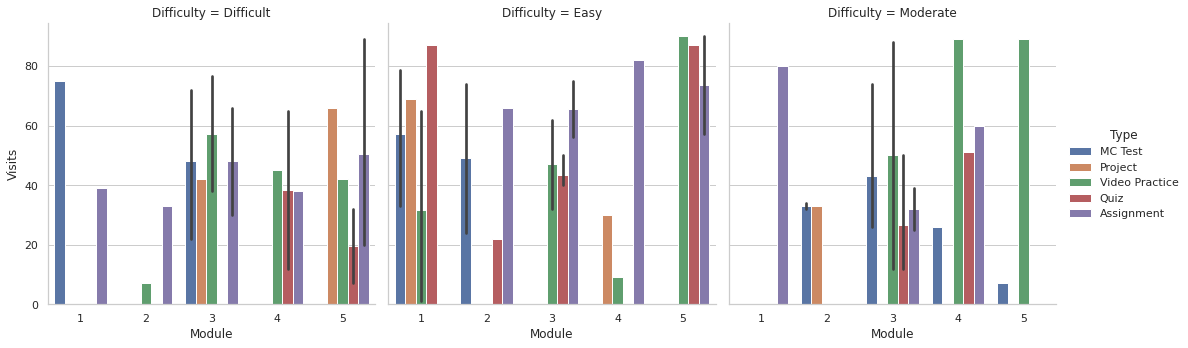

In [66]:
#YOUR CODE GOES HERE
sns.catplot(x='Module', y='Visits', hue='Type', col='Difficulty',
              kind = 'bar', data=ccomps)

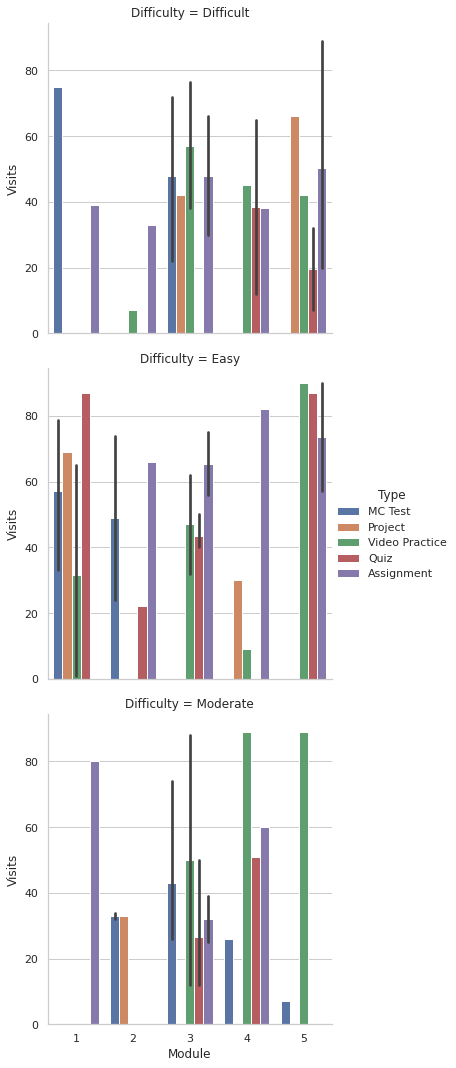

In [67]:
sns.catplot(x='Module', y='Visits', hue='Type', row='Difficulty',
              kind = 'bar', data=ccomps)

`catplot` supports other plot types that may be useful depending on what you are
trying to display. 

For example, **box plots** (which show the median, quartiles, and outliers) can be an effective visualization type:

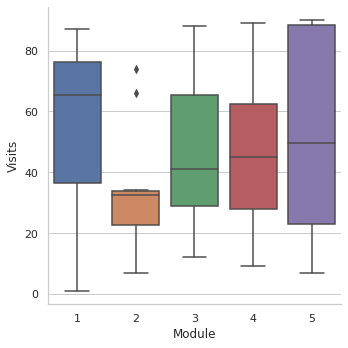

In [68]:
sns.catplot(x='Module', y='Visits', kind = 'box',data=ccomps)

## 3. Other Python Visualisation Tools
As is common with open source, there are a plethora of options for creating graphics
in Python (too many to list). Since 2010, much development effort has been focused
on creating interactive graphics for publication on the web. With tools like **Bokeh** and
**Plotly**, it’s now possible to specify dynamic, interactive graphics in Python that are
destined for a web browser.

For creating static graphics for print or web, I recommend defaulting to matplotlib
and add-on libraries like pandas and seaborn for your needs. For other data visualization
requirements, it may be useful to learn one of the other available tools out there.
I encourage you to explore the ecosystem as it continues to involve and innovate into
the future.